In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df= pd.read_csv("hourly.csv")

In [3]:
columns=["instant", "dteday", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "temp"]

df= df.drop(columns, axis=1)

In [4]:
# splitting features into dependent(y) and independent features(X)

X = df.drop("cnt",axis=1)
y = df["cnt"]

In [5]:
# normalizing independent features to a single scale using standard scalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = ['season', 'weathersit', 'atemp', 'hum', 'windspeed', 'casual','registered']

In [6]:
# Splitting data into train and test sample using 70% data for training and 30% data for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

__Training a Linear Regression Model:__

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print("The Intercept for the given Liner Regresssion is = ", lm.intercept_)

The Intercept for the given Liner Regresssion is =  189.46308763450142


In [9]:
print("Coefficients are as follows:")
a=list(lm.coef_)
for m,n in zip(X,a):
     print(m,"=",n)

Coefficients are as follows:
season = -8.361003111942355e-14
weathersit = -4.8936213436879296e-14
atemp = -7.175283917632203e-14
hum = -3.9811271380256466e-14
windspeed = -1.9167291312003743e-14
casual = 49.30361184341801
registered = 151.3529312470882


In [10]:
# making predictions
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

In [11]:
from sklearn import metrics

In [12]:
# calculating Root Mean Square Error for evaluation of model
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [13]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.7694107212521516e-13
RMSE for test set is 1.7864014125813756e-13


In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df.head()

,Actual,Predicted
17294,178,178.0
10770,224,224.0
13417,162,162.0
8207,151,151.0
7604,140,140.0


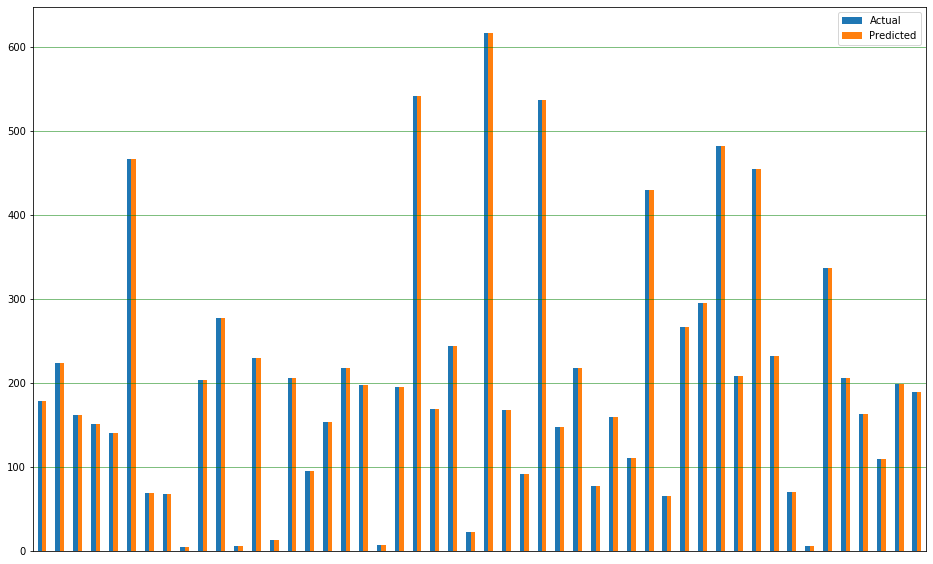

In [15]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks([])
plt.show()

__Training a Random-Forest Regression Model:__

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [17]:
# making predictions
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [18]:
# calculating Root Mean Square Error for evaluating model
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [19]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.0260184582625387
RMSE for test set is 2.220449448891478


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df.head()

,Actual,Predicted
17294,178,176.882
10770,224,224.639
13417,162,160.894
8207,151,151.109
7604,140,139.704


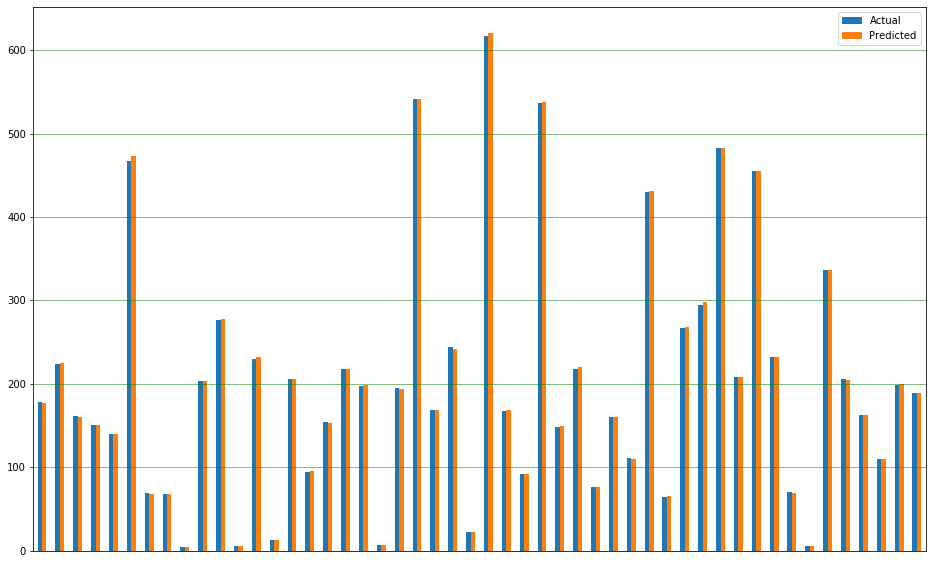

In [21]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks([])
plt.show()